# Binomial Distribution of Random Variable

> This notebook is made to visualize the binomial distribution of random variable

## Question

A class of 80 student was given a set of 10 damped genminating seeds each, the students were asked to return the seeds after a week and report the number of seeds the germinated.
The probability of seeds germinating in a specific set was 0.2.
The outcome was that for 6 students no seeds germinated while only five students had the maximum number of germinating seeds, i.e. 6. 

Given the frequency distribution table with just class-interval and respective frequencies for the above scenario, fit the data to a binomial distribution.


| x    | 0 | 1  | 2  | 3  | 4 | 5 | 6 | 7 | 8 | 9 | 10 |
|------|---|----|----|----|---|---|---|---|---|---|----|
| f(x) | 6 | 20 | 28 | 12 | 8 | 6 | 0 | 0 | 0 | 0 | 0  |



In [50]:
# data from the given question
observed_frequency = [6, 20, 28, 12, 8, 6, 0, 0, 0, 0, 0, ]
x = [y for y in range(11)]

n = 10
p = .2175  # probability of success
q = 1 - p  # probability of failure

passes = sum(observed_frequency)
print(passes)  # should be equal to 80 as per our question

80


# Visualizing the input data

Before finding the best fit line lets see the scattered data in a scatter plot.


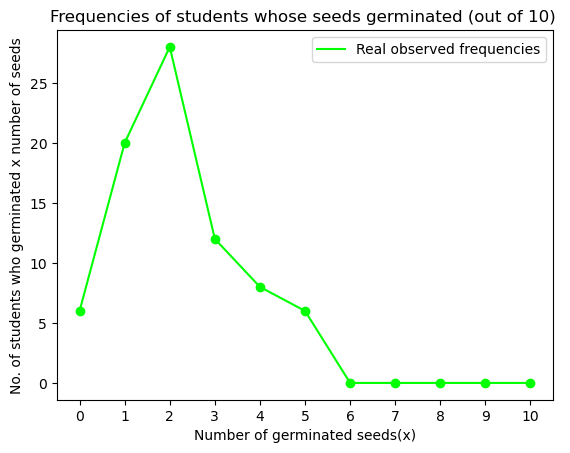

In [101]:
import matplotlib.pyplot as plt

plt.scatter(x, observed_frequency, color="lime")
plt.plot(x, observed_frequency, color="lime", label="Real observed frequencies")
plt.xlabel("Number of germinated seeds(x)")
plt.ylabel("No. of students who germinated x number of seeds")
plt.title("Frequencies of students whose seeds germinated (out of 10) ")
plt.legend()

plt.xticks(ticks=x)
plt.show()

## This notebook uses custom implementation of combination and factorial function for making the domain of these function to a set of real numbers

In [61]:
'''
this section has some custom implementation of factorial and ncr function for increased accuracy
'''

from scipy.special import gamma

def factorial(x):
    return gamma(x+1)

def comb(n, r):
    return factorial(n) / factorial(n-r) / factorial(r)

# Finding probability of each possibility

Using binomial distribution to compute the probability of each outcome

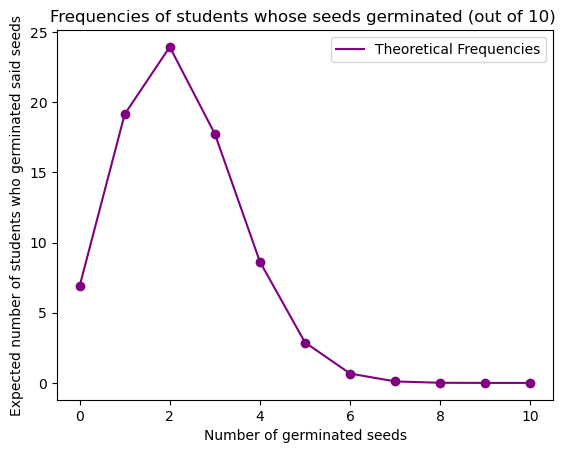

In [102]:
def probability(r):
    return comb(n, r) * (p ** r) * (q ** (n-r))


def t(r):
    return passes * probability(r)


theoretical_frequency = [float(t(y)) for y in x]

# Visulizing the calculated frequencies
plt.scatter(x, theoretical_frequency, color="purple")
plt.plot(x, theoretical_frequency, color="purple", label="Theoretical Frequencies")
plt.xlabel("Number of germinated seeds")
plt.ylabel("Expected number of students who germinated said seeds")
plt.title("Frequencies of students whose seeds germinated (out of 10) ")
plt.legend()

plt.show()

# Finding variance from observed trend

Calculating the deviation of real outcome from theoretical or calculated outcome as defined by binomial theorem.



In [60]:
import math

def calculate_rmse(observed_frequency, theoretical_frequency):
    """
    Calculate the Root Mean Square Error (RMSE) between observed and theoretical frequencies.
    
    Parameters:
        observed_frequency (list): List of observed frequency values.
        theoretical_frequency (list): List of theoretical frequency values.
    
    Returns:
        float: The RMSE value.
    """
    if len(observed_frequency) != len(theoretical_frequency):
        raise ValueError("Observed and theoretical frequencies must have the same length.")
    
    # Calculate squared differences
    squared_differences = [(v - observed_frequency[i]) ** 2 for i, v in enumerate(theoretical_frequency)]
    
    # Calculate mean squared difference
    mean_squared_difference = sum(squared_differences) / len(squared_differences)
    
    # Calculate RMSE
    rmse = math.sqrt(mean_squared_difference)
    
    return rmse

rmse = calculate_rmse(observed_frequency, theoretical_frequency)
print(f"RMSE: {rmse:.4f}")

RMSE: 2.3666


Text(0.5, 1.0, 'Actual and calculated frequency distribution comparison')

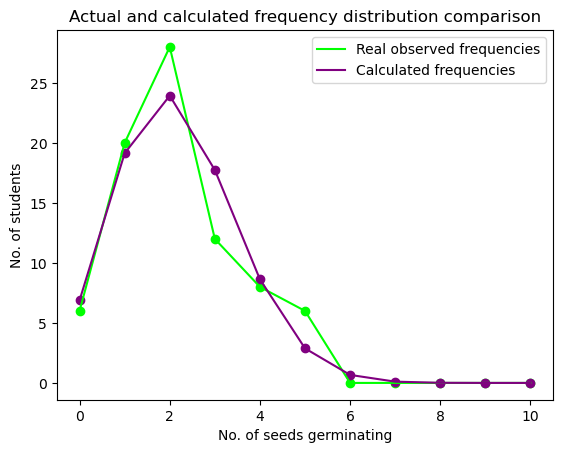

In [99]:
# drawing the first curve
plt.scatter(x, observed_frequency, color="lime")
plt.plot(x, observed_frequency, color="lime", label="Real observed frequencies")

#drawing the second curve
plt.scatter(x, theoretical_frequency, color="purple")
plt.plot(x, theoretical_frequency, color="purple", label="Calculated frequencies")


plt.xlabel("No. of seeds germinating")
plt.ylabel("No. of students")
plt.legend()
plt.title("Actual and calculated frequency distribution comparison")



# How to improve the result? 

Is there any way to fit the theoretical outcome better into the real scattered plot?
For instance including any more variables.